In [1]:
# importing neccessary libraries
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import inspect



In [2]:

# Add the scripts directory to the path to access Model_training.py
scripts_path = os.path.abspath('C:/Users/user/Desktop/Github/Adey_FraudDetection/scripts')
sys.path.append(scripts_path)

# Attempt to import the module
try:
    import Model_training  # Import the entire module first

    # Now list all functions in the Model_training module
    functions_list = inspect.getmembers(Model_training, inspect.isfunction)
    print("Functions available in Model_training:", [name for name, _ in functions_list])

    # Attempt to import specific functions only after checking
    from Model_training import prepare_data, define_and_train_models

except ImportError as e:
    print("ImportError:", e)
    print("Check if 'Model_training.py' is available in the scripts directory and contains the functions.")

except Exception as e:
    print("An unexpected error occurred:", e)

Functions available in Model_training: ['accuracy_score', 'build_and_train_cnn', 'build_and_train_lstm', 'build_and_train_rnn', 'define_and_train_models', 'prepare_data', 'train_test_split']


In [3]:
# Step 2: Prepare the data
(X_train_cc, X_test_cc, y_train_cc, y_test_cc), (X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud) = prepare_data()

# Step 3: Define and train models
results = define_and_train_models(X_train_cc, y_train_cc, X_test_cc, y_test_cc,
                                   X_train_fraud, y_train_fraud, X_test_fraud, y_test_fraud)

# Step 4: Create a DataFrame for results
accuracy_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Credit Card Accuracy': [metrics['Credit Card Accuracy'] for metrics in results.values()],
    'Fraud Accuracy': [metrics['Fraud Accuracy'] for metrics in results.values()]
})

# Step 5: Display the DataFrame
print(accuracy_df)


Training Logistic Regression...
Accuracy (Credit Card Data): 0.9990695551420246
Accuracy (Fraud Data): 0.9057009562253913



2024/10/20 15:03:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Logistic_Regression'.
Created version '1' of model 'Logistic_Regression'.


Training Decision Tree...
Accuracy (Credit Card Data): 0.9991748885221726
Accuracy (Fraud Data): 0.8930615756212156



2024/10/20 15:04:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Decision_Tree'.
Created version '1' of model 'Decision_Tree'.


Training Random Forest...
Accuracy (Credit Card Data): 0.9995962220427653
Accuracy (Fraud Data): 0.9365383979088774



2024/10/20 15:10:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Random_Forest'.
Created version '1' of model 'Random_Forest'.


Training Gradient Boosting...
Accuracy (Credit Card Data): 0.9989466661985184
Accuracy (Fraud Data): 0.9056347814578302



2024/10/20 15:19:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Gradient_Boosting'.
Created version '1' of model 'Gradient_Boosting'.


Training Multi-Layer Perceptron...
Accuracy (Credit Card Data): 0.999420666409185
Accuracy (Fraud Data): 0.9057009562253913



2024/10/20 15:20:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Multi-Layer_Perceptron'.
Created version '1' of model 'Multi-Layer_Perceptron'.
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


2024/10/20 15:26:36 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


Accuracy (CNN on Fraud Data): 0.9057009562253913



2024/10/20 15:28:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'CNN'.
Created version '1' of model 'CNN'.
2024/10/20 15:28:40 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


Accuracy (RNN on Fraud Data): 0.9057009562253913



2024/10/20 15:28:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'RNN'.
Created version '1' of model 'RNN'.


Accuracy (LSTM on Fraud Data): 0.9057009562253913



2024/10/20 15:28:49 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/20 15:28:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'LSTM'.
Created version '1' of model 'LSTM'.


                    Model  Credit Card Accuracy  Fraud Accuracy
0     Logistic Regression              0.999070        0.905701
1           Decision Tree              0.999175        0.893062
2           Random Forest              0.999596        0.936538
3       Gradient Boosting              0.998947        0.905635
4  Multi-Layer Perceptron              0.999421        0.905701
5                     CNN                   NaN        0.905701
6                     RNN                   NaN        0.905701
7                    LSTM                   NaN        0.905701


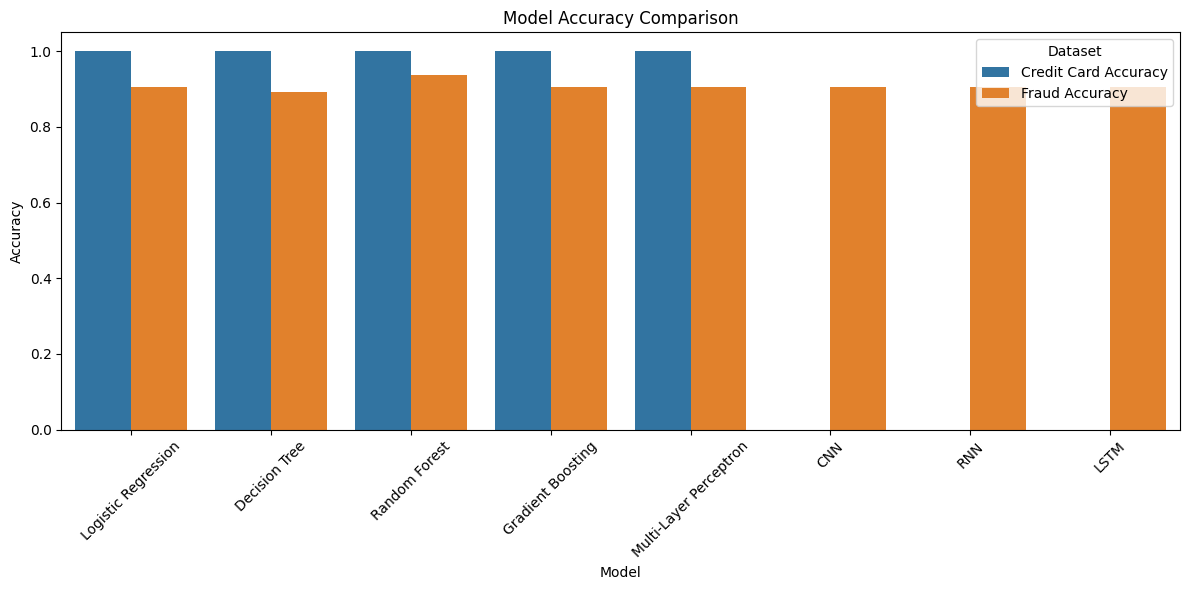

In [4]:

# Step 6: Visualization of model accuracies
plt.figure(figsize=(12, 6))
accuracy_df_melted = accuracy_df.melt(id_vars='Model',
                                        value_vars=['Credit Card Accuracy', 'Fraud Accuracy'],
                                        var_name='Dataset',
                                        value_name='Accuracy')

sns.barplot(data=accuracy_df_melted, x='Model', y='Accuracy', hue='Dataset')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()
